# Predicting Forest Fire Burned Area from Meteorological Data

Data from https://www.kaggle.com/datasets/elikplim/forest-fires-data-set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
fire_data = pd.read_csv('forestfires.csv')
fires = fire_data.copy()

## Exploratory Analysis of Fires

Code references tutorial https://www.askpython.com/python/examples/python-predict-function
Accuracy references https://towardsdatascience.com/k-nearest-neighbors-94395f445221

- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month - month of the year: "jan" to "dec"
- day - day of the week: "mon" to "sun"
- FFMC - FFMC index from the FWI system: 18.7 to 96.20
- DMC - DMC index from the FWI system: 1.1 to 291.3
- DC - DC index from the FWI system: 7.9 to 860.6
- ISI - ISI index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
- rain - outside rain in mm/m2 : 0.0 to 6.4
- area - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [4]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
fires.describe()

In [ ]:
fires.groupby(['month']).count()

<Axes: >

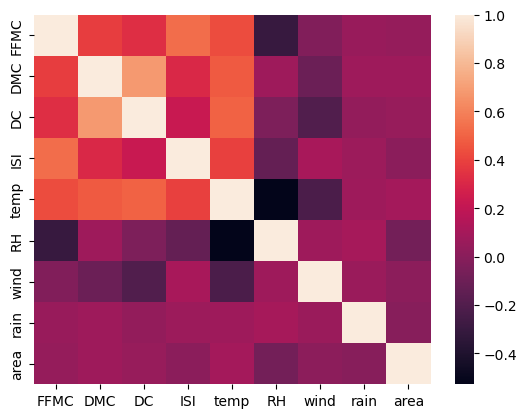

In [5]:
# correlations
sns.heatmap(fires[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']].corr())

## Predict with K-Nearest Neighbors Algorithm, Test 1

In [6]:
columns = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
X = fires[columns]  # Dependent variables
Y = fires['area']  # Independent variable

In [7]:
# Separate 80% data into training set and 20% into test set
# random_state=0 ensures that the results are reproducible
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [8]:
# Applying k-nearest neighbors model
KNN_model = KNeighborsRegressor(n_neighbors=3)
KNN_model.fit(X_train,Y_train)
KNN_predict = KNN_model.predict(X_test) # Predictions on testing data
print(KNN_predict)

[1.93433333e+01 1.04000000e+00 1.89666667e+00 8.75566667e+01
 2.67666667e+00 0.00000000e+00 8.43333333e-01 5.66666667e-02
 3.23666667e+00 1.06000000e+00 1.18000000e+00 1.77833333e+01
 1.47333333e+00 5.83333333e-01 4.63666667e+00 4.66666667e-01
 3.44666667e+00 8.91333333e+00 0.00000000e+00 2.73333333e+00
 2.27666667e+00 0.00000000e+00 5.18000000e+00 5.83333333e-01
 1.10666667e+01 4.56666667e+00 3.73333333e-01 5.78666667e+00
 1.80666667e+00 2.01333333e+00 3.74666667e+00 8.66333333e+00
 1.67666667e+00 9.23333333e-01 0.00000000e+00 1.84506667e+02
 0.00000000e+00 3.56666667e-01 4.12563333e+02 3.88333333e+00
 2.97333333e+01 3.56666667e-01 7.10000000e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.06000000e+00 2.01333333e+00
 7.63333333e-01 1.23333333e+00 0.00000000e+00 4.38333333e+00
 2.39666667e+00 2.12866667e+01 1.89666667e+00 1.81333333e+00
 2.51000000e+00 3.77333333e+00 5.42666667e+00 4.24000000e+00
 1.16666667e+00 3.86666667e-01 3.56666667e-01 4.39000000e+01
 3.13733333e+01 1.845066

In [9]:
error = mean_squared_error(Y_test, KNN_predict)
print("Mean Squared Error:", error)

Mean Squared Error: 4526.339010470085


## Refine Model

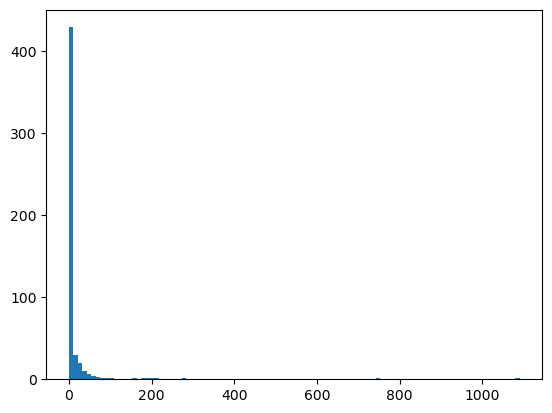

In [10]:
# original data
plt.hist(fires['area'], bins=100)
plt.show()

Data is skewed because many fires were reported with an area of 0.0

In [11]:
# Create new column with area scaled https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
# https://aosmith.rbind.io/2018/09/19/the-log-0-problem/ address 0.0
fires['arealog'] = np.log10(fires['area'] + 1)

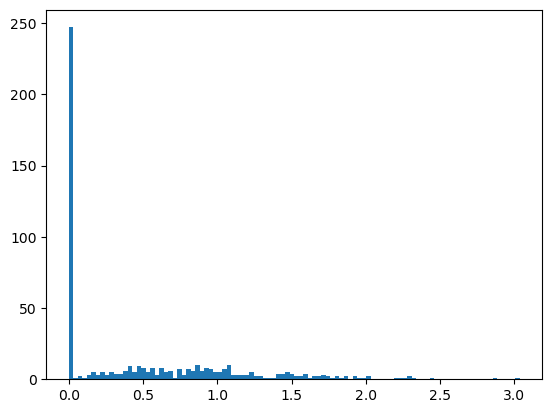

In [12]:
# transformed data
plt.hist(fires['arealog'], bins=100)
plt.show()

In [13]:
columns = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
X = fires[columns]  # Dependent variables
Y = fires['arealog']  # Independent variable

# Separate 80% data into training set and 20% into test set
# random_state=0 ensures that the results are reproducible
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

## Predict with K-Nearest Neighbors Algorithm, Test 2

In [14]:
# Applying k-nearest neighbors model
KNN_model = KNeighborsRegressor(n_neighbors=12)
KNN_model.fit(X_train,Y_train)
KNN_predict = KNN_model.predict(X_test) # Predictions on testing data
print(KNN_predict)

[0.80898049 0.5785589  0.49210095 1.63064048 0.36483841 0.1470221
 0.34030457 0.09318156 0.41750061 0.36228886 0.34728757 0.76632631
 0.35970619 0.13780388 0.50179412 0.3310422  0.17538383 0.4845405
 0.38460064 0.41019744 0.23916375 0.42679924 0.43989613 0.54302987
 0.50179412 0.45364249 0.20874101 0.31092615 0.48220098 0.31682095
 0.34657078 0.27798161 0.41088473 0.27433429 0.16098827 1.83282842
 0.         0.1674902  2.15816354 0.5690664  0.83685617 0.18683245
 0.21163469 0.06591571 0.40253464 0.21075029 0.27855258 0.31682095
 0.10456418 0.34144793 0.09356658 0.49972586 0.48214965 0.91037101
 0.50113625 0.23731468 0.45997103 0.22775052 0.62257863 0.24868468
 0.20558502 0.21647411 0.62170076 1.00876    0.87080847 1.95886331
 0.32298695 0.27798161 0.26557155 0.50478108 0.25256578 0.34945853
 0.0811759  0.24831779 0.42876619 0.34096996 0.50179412 0.14371602
 0.50523944 0.30749218 0.3727305  0.15937512 0.03661106 0.78574266
 0.38460064 0.42703372 0.41019744 0.42679924 0.39801367 0.346570

In [15]:
error = mean_squared_error(Y_test, KNN_predict)
print("Mean Squared Error:", error)

Mean Squared Error: 0.2421303119891338


## Predict with Decision Tree Algorithm, Test 1

Code references tutorial https://www.askpython.com/python/examples/python-predict-function
Accuracy references https://towardsdatascience.com/k-nearest-neighbors-94395f445221

In [16]:
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) # Predictions on testing data
print(DT_predict)

[1.44775081 0.         0.50501867 1.96662207 0.56442084 0.
 0.47269535 0.         1.27253601 0.         0.56442084 1.44775081
 1.01819662 0.         1.27253601 0.         0.42469677 1.70541063
 0.30509895 0.93328575 0.         0.62081775 0.76937573 0.86382564
 1.81845733 1.44775081 0.         0.         0.         0.
 0.         0.62081775 0.         1.01819662 0.86382564 2.25971078
 0.         0.42469677 2.87348336 0.         1.70541063 0.
 0.1593298  0.         0.         0.42469677 0.86382564 0.
 0.42469677 0.47269535 0.76937573 1.0862831  0.         1.56551006
 0.86382564 0.         0.         0.         0.93328575 1.56551006
 0.         0.24172256 0.93328575 1.70541063 1.56551006 2.25971078
 0.         0.62081775 0.         1.70541063 1.01819662 0.
 0.         0.76937573 0.56442084 0.         0.         0.
 0.86382564 0.         0.67744111 0.24172256 0.         0.
 0.         1.0862831  0.50501867 0.86382564 0.56442084 0.
 1.56551006 1.96662207 0.19836623 0.         0.         0.


In [17]:
error = mean_squared_error(Y_test, DT_predict)
r2 = r2_score(Y_test, DT_predict)
print("Mean Squared Error:", error)
print("R2 Score:", r2)

Mean Squared Error: 0.0006766245596908125
R2 Score: 0.9985099657230224


In [ ]:
# f2 score

# california region
# predict, for a given location, what is the probability of a fire